# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Задача — установить параметры для определения рыночной стоимости объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Описание данных в базе:   
•	airports_nearest — расстояние до ближайшего аэропорта в метрах (м)   
•	balcony — число балконов   
•	ceiling_height — высота потолков (м)   
•	cityCenters_nearest — расстояние до центра города (м)   
•	days_exposition — сколько дней было размещено объявление (от публикации до снятия)   
•	first_day_exposition — дата публикации   
•	floor — этаж   
•	floors_total — всего этажей в доме   
•	is_apartment — апартаменты (булев тип)   
•	kitchen_area — площадь кухни в квадратных метрах (м²)   
•	last_price — цена на момент снятия с публикации   
•	living_area — жилая площадь в квадратных метрах(м²)   
•	locality_name — название населённого пункта   
•	open_plan — свободная планировка (булев тип)   
•	parks_around3000 — число парков в радиусе 3 км   
•	parks_nearest — расстояние до ближайшего парка (м)   
•	ponds_around3000 — число водоёмов в радиусе 3 км   
•	ponds_nearest — расстояние до ближайшего водоёма (м)   
•	rooms — число комнат   
•	studio — квартира-студия (булев тип)   
•	total_area — площадь квартиры в квадратных метрах (м²)   
•	total_images — число фотографий квартиры в объявлении   

Краткий план работы:
- Шаг 1. Открытие файла с данными и изучение общей информации
- Шаг 2. Предобработка данных
- Шаг 3. Расчет и добавление в таблицу необходимых данных (цена кв.м и др.)
- Шаг 4. Исследовательский анализ данных
- Шаг 5. Общий вывод

### Шаг 1. Изучение общей информации о базе данных. 

In [284]:
import pandas as pd

In [285]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [287]:
len(df)

23699

In [288]:
df.duplicated().sum()

0

In [289]:
loc_name_list = df['locality_name'].value_counts()
loc_name_list

Санкт-Петербург                                            15721
посёлок Мурино                                               522
посёлок Шушары                                               440
Всеволожск                                                   398
Пушкин                                                       369
Колпино                                                      338
посёлок Парголово                                            327
Гатчина                                                      307
деревня Кудрово                                              299
Выборг                                                       237
Петергоф                                                     201
Сестрорецк                                                   183
Красное Село                                                 178
Кудрово                                                      173
деревня Новое Девяткино                                      144
Сертолово                

### Вывод по общей информации

- В ряде столбцов присутствуют пропуски. Возможные причины их появления и варианты заполнения рассмотрим ниже на стадии предобработки данных. А пока отметим, что для некоторых пропущенных значений можно предположить логичную замену. Для других типов данных подходящего значения на замену нет. В этом случае правильно оставить эти значения пустыми.   
- Некоторые типы данных придется заменить.
- Дупликатов строк нет.
- Присутствуют смысловые дупликаты в 'locality_name'.

### Шаг 2. Предобработка данных

#### Обработка пропусков и смысловых дупликатов 'locality_name'

Оставим только названия населенных пунктов без указания их типов (например, вместо "поселок Мурино" оставим "Мурино"). Примем допущение, что населенных пунктов разных типов с одинаковым названием несущественно мало.

In [290]:
# удалим строки с неизвестным 'locality_name',
# т.к. местоположение объекта недвижимости является критической информацией.:
df.dropna(subset=['locality_name'], inplace=True)

In [291]:
# создадим множество возможных терминов (и слов, входящих в термины), обозначающих типы населенных пунктов:
types = {'город', 'поселок', 'посёлок', 'городского', 'типа', 'городской', 'коттеджный', 'станции', 'село','деревня', 'при', 'железнодорожной'}
df['locality_name']=df['locality_name'].astype('str')

# удалим эти слова из 'locality_name':
def name(text):
    line = set(text.split())
    loc_name = line - types
    return str(loc_name)[2:-2]
df['loc_name'] = df['locality_name'].apply(name)

#### Обработка пропусков в других столбцах

In [292]:
# список столбцов с пропусками:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area             2269
balcony                 11513
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
loc_name                    0
dtype: int64

In [293]:
# заменим пропуски в 'is_apartment' на 'False', т.к. можно предположить, что продавец по умолчанию считает свой объект
# не апартаментами, а жилым помещением.
df['is_apartment'].fillna('False', inplace=True)

In [294]:
# Заменим пропуски в 'balcony', 'parks_around3000' и 'ponds_around3000' на 0. 
# Скорее всего, если продавец не указал эти преимущества объекта, то их просто нет.
df.update(df[['balcony', 'parks_around3000', 'ponds_around3000']].fillna(0))

Пропуски в 'days_exposition' либо могут быть обусловлены тем, что объект на момент составления базы данных еще не был продан, либо могут просто являться отсутствием информации.

Проверим 1-й вариант. Примем за дату составления базы данных дату создания файла real_estate_data.csv. Если объект еще не продан, то пропущенные значения 'days_exposition' не могут быть меньше периода с 'first_day_exposition' до даты создания файла real_estate_data.csv. Вычислим этот период - создадим столбец 'days_running' - и сравним его значения со статистическими данными 'days_exposition'.

In [295]:
# импорт библиотек
import os
import datetime

In [296]:
# выясним дату последнего изменения файла данных /datasets/real_estate_data.csv
modTimesinceEpoc = os.path.getmtime('/datasets/real_estate_data.csv')
modDate = datetime.datetime.fromtimestamp(modTimesinceEpoc)
print("Last Modified Time : ", modDate.strftime('%Y-%m-%d'))

Last Modified Time :  2019-08-22


In [297]:
# переведем 'first_day_exposition' из формата object в формат datetime:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
# создадим столбец 'days_running':
df['days_running'] = modDate - df['first_day_exposition']
# переведем'days_running' из формата timedelta в формат int64:
def td_i(x):
    x = x.days
    return x
df['days_running'] = df['days_running'].apply(td_i)

In [298]:
# запишем числовое описание параметра "время продажи" как series
days_descr = df['days_exposition'].describe()
days_descr

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [299]:
day_med = days_descr['50%'] # медиана
day_q2 = days_descr['75%'] # верхний квартиль
day_iqr = days_descr['75%']-days_descr['25%'] # межквартильный размах
day_high = day_q2 + day_iqr*1.5 # верхняя граница диаграммы размаха

In [300]:
# количество пропусков, значения 'days_running' которых <= медианы
df[(df['days_running']<=day_med)&(df['days_exposition'].isna())]['days_running'].count()

0

In [301]:
# количество пропусков, значения 'days_running' которых > верхней границы диаграммы размаха
df[(df['days_running']>day_high)&(df['days_exposition'].isna())]['days_running'].count()

580

Судя по тому, что ВСЕ значения 'days_running', соответсвующие пропущенным значениям 'days_exposition', превышают медиану, и значительная часть (18%) этих значений лежит за пределами диаграммы размаха, делаем вывод, что причиной пропусков 'days_exposition' является просто отсутствие информации.

In [302]:
# удалим вспомогательный столбец 'days_running'
del df['days_running']

Создадим столбец 'days_processed', который представляет собой 'days_exposition' с учетом замены пропусков на медианные значения соответствующих населенных пунктов.

In [303]:
def days_guess(row):
    med = df[(df['loc_name']==row['loc_name'])&(df['days_exposition'].isna()==False)]['days_exposition'].median()
    return med
df['days_processed'] = df['days_exposition']
df.loc[df['days_exposition'].isna(), 'days_processed']= df[df['days_exposition'].isna()].apply(days_guess, axis=1)

Заполним пропуски в данных о площади кухни и жилой площади исходя из соотношения соответсвующих значений со значениями общей площади объектов с известными данными. Будем использовать медианы.

In [304]:
# определим долю площади кухни от общей площади
kitch_kf = df['kitchen_area'].median()/df['total_area'].median()
# (примечание: проверено, что выражение
# "kitch_koef = df[df['kitchen_area'].isna()==False]['kitchen_area'].median()/df['total_area'].median()"
# даёт тот же результат)
kitch_kf

0.175

In [305]:
# заполним пропуски в данных о площади кухни
df['kitchen_area']=df['kitchen_area'].fillna(df['total_area']*kitch_kf)

In [306]:
# определим долю площади кухни от общей площади
la_kf = df['living_area'].median()/df['total_area'].median()
la_kf

0.5769230769230769

In [307]:
# заполним пропуски в данных о жилой площади
df['living_area']=df['living_area'].fillna(df['total_area']*la_kf)

Было замечено, что некоторые значения количества комнат равны нулю.

In [308]:
df[df['rooms']==0]['rooms'].count()

197

Хотя это число и незначительно, заменим значения комнат =0 на значения количества комнат в объектах аналогичной площади.

In [309]:
# числовое описание параметра "число комнат"
df['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [310]:
# создадим таблицу зависимости числа комнат от площади объекта в пределах межквартильного размаха.
# за максимально возможное количество комнат примем 6, т.к. это соответсвует верхнему значению диаграммы размаха. 
columns = ['rooms', 'low', 'high']
data = []
for i in range(1,7):
    ta = df[df['rooms']==i]['total_area'].describe()
    low = ta['25%']
    high = ta['75%']
    row = [i, low, high]
    data.append(row)
room_info = pd.DataFrame(data = data, columns=columns)
room_info

,rooms,low,high
0,1,32.500,41.00
1,2,46.000,62.00
2,3,62.000,87.00
3,4,77.800,125.35
4,5,117.475,183.75
5,6,152.000,236.00


In [311]:
# т.к. квартили смежных категорий накладываются или не доходят друг до друга,
# то в качестве пограничного значения примем арифметическое среднее квартилей 
for i in range (6):
    m1 = room_info.loc[i, 'high']
    try:
        m2 = room_info.loc[i+1, 'low']
        m = (m1+m2)/2
        room_info.loc[i, 'high'] = m
        room_info.loc[i+1, 'low'] = m
    except:
        m2 = m1
room_info

,rooms,low,high
0,1,32.5000,43.5000
1,2,43.5000,62.0000
2,3,62.0000,82.4000
3,4,82.4000,121.4125
4,5,121.4125,167.8750
5,6,167.8750,236.0000


In [312]:
# заменим значения комнат =0 на наиболее вероятные значения согласно таблице room_info
def room_guess(row):
    for i in range(6):
        if row['total_area'] < room_info.loc[i,'high']:
            return i+1
        if row['total_area'] >= room_info.loc[5,'high']:
            return 6
df.loc[df['rooms']==0,'rooms'] = df[df['rooms']==0].apply(room_guess, axis=1)

In [313]:
df[df['rooms']==0]['rooms'].count()

0

In [314]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
loc_name                    0
days_processed             32
dtype: int64

Причиной оставшихся пропусков в оригинальном файле является отсутствие информации. Поэтому оставим эти значения как есть, пустыми.

#### Замена типов данных

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23565 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        23650 non-null float64
parks_nearest           8064 non-null float64
ponds_

In [316]:
# 'is_apartment' из формата object в формат bool:
df['is_apartment'] = df['is_apartment'].astype('bool')

### Шаг 3. Посчитайте и добавьте в таблицу

In [317]:
# цена кв.метра:
df['per_sqm'] = (df['last_price'] / df['total_area']).round(0)

In [318]:
# день недели публикации объявления:
def wd(ddate):
    dname = ddate.weekday()
    if dname == 0:
        return 'пн'
    if dname == 1:
        return 'вт'
    if dname == 2:
        return 'ср'
    if dname == 3:
        return 'чт'
    if dname == 4:
        return 'пт'
    if dname == 5:
        return 'сб'
    return 'вс'
df['weekday'] = df['first_day_exposition'].apply(wd)

In [319]:
# номер дня недели (0 - пн, 6 - вс)
def wd_nr(ddate):
    wd = ddate.weekday()
    return wd
df['weekday_nr'] = df['first_day_exposition'].apply(wd_nr)

In [320]:
# номер месяца размещения объявления
def m_nr(ddate):
    m = ddate.month
    return m
df['month_nr'] = df['first_day_exposition'].apply(m_nr)

In [321]:
# год размещения объявления
def y_nr(ddate):
    yyyy = ddate.year
    return yyyy
df['year'] = df['first_day_exposition'].apply(y_nr)

In [322]:
# этаж - первый, последний, другой:
def level(row):
    floor = row['floor']
    max_floor = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == max_floor:
        return 'последний'
    return 'другой'
df['level']=df.apply(level, axis=1)

In [323]:
# отношение жилой площади к общей площади:
df['liv/tot_ratio'] = (df['living_area'] / df['total_area']).round(2)

# отношение площади кухни к общей площади:
df['kitch/tot_ratio'] = (df['kitchen_area'] / df['total_area']).round(2)

In [324]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,loc_name,days_processed,per_sqm,weekday,weekday_nr,month_nr,year,level,liv/tot_ratio,kitch/tot_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,True,False,False,25.000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,95.0,120370.0,чт,3,3,2019,другой,0.47,0.23
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.600000,1,True,False,False,11.000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары,81.0,82921.0,вт,1,12,2018,первый,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.300000,4,True,False,False,8.300,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,558.0,92786.0,чт,3,8,2015,другой,0.61,0.15
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,91.730769,9,True,False,False,27.825,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,424.0,408176.0,пт,4,7,2015,другой,0.58,0.18
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,True,False,False,41.000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,121.0,100000.0,вт,1,6,2018,другой,0.32,0.41


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Шаг 4а. Параметры квартир

#### Графики параметров

Построим диаграмму размаха и гистограмму для следующих параметров:
- площадь,   
- цена кв.м,   
- число комнат,
- высота потолков.

In [325]:
# импорт библиотеки matplotlib
import matplotlib.pyplot as plt

In [425]:
# список параметров
features = ['total_area', 'per_sqm', 'rooms', 'ceiling_height']

Диаграмма размаха: total_area


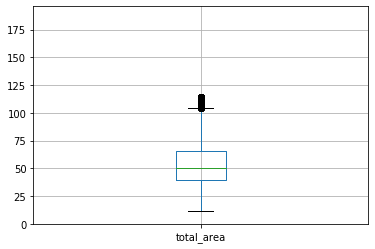

Гистограмма: total_area


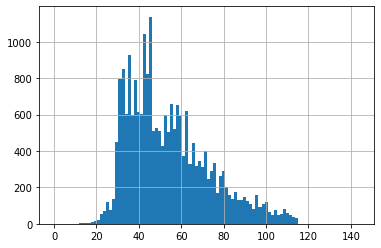


Диаграмма размаха, Санкт-Петербург: per_sqm


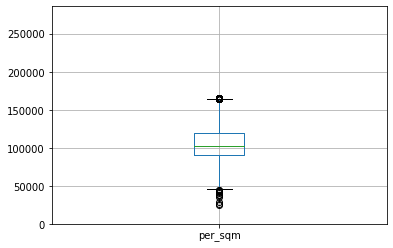

Диаграмма размаха, Ленинградская область: per_sqm


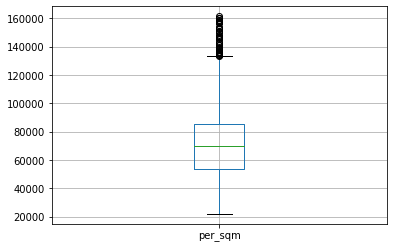

Гистограмма, Санкт-Петербург: per_sqm


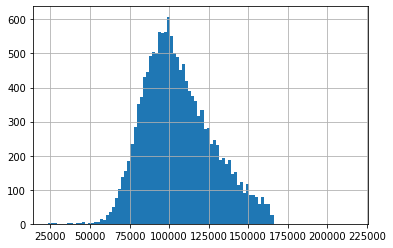

Гистограмма, Ленинградская область: per_sqm


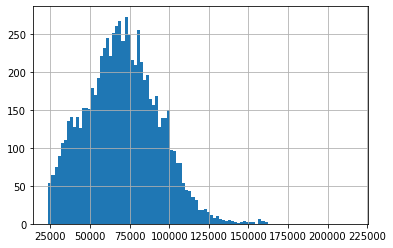


Диаграмма размаха: rooms


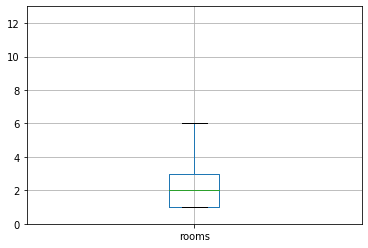

Гистограмма: rooms


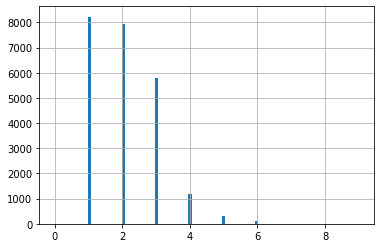


Диаграмма размаха: ceiling_height


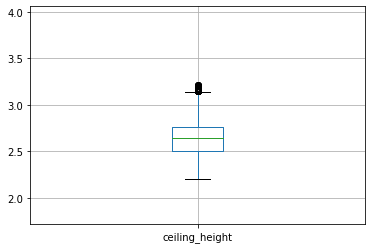

Гистограмма: ceiling_height


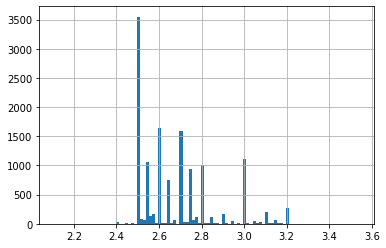

In [427]:
for f in features:
    f_descr=df[f].describe()
    iqr = f_descr['75%']-f_descr['25%']
    xlow = f_descr['25%']-1.5*iqr
    if xlow<0:
        xlow=0
    xhigh = f_descr['75%']+3*iqr
    ymin = f_descr['25%']-3*iqr
    if ymin<0:
        ymin=0
    ymax = f_descr['75%']+5*iqr
    plt.ylim(ymin,ymax)
    if f=='per_sqm':
        print('Диаграмма размаха, Санкт-Петербург:', f)
        df[df['loc_name'] == 'Санкт-Петербург'].boxplot(column='per_sqm')
        plt.show()
        print('Диаграмма размаха, Ленинградская область:', f)
        df[df['loc_name'] != 'Санкт-Петербург'].boxplot(column='per_sqm')
        plt.show()
        print('Гистограмма, Санкт-Петербург:', f)
        df[df['loc_name'] == 'Санкт-Петербург']['per_sqm'].hist(bins=100, range=(xlow,xhigh))
        plt.show()
        print('Гистограмма, Ленинградская область:', f)
        df[df['loc_name'] != 'Санкт-Петербург']['per_sqm'].hist(bins=100, range=(xlow,xhigh))
        plt.show()
    else:
        print('Диаграмма размаха:', f)
        df.boxplot(column=f)
        plt.show()
        print('Гистограмма:', f)
        df[f].hist(bins=100, range=(xlow,xhigh))
        plt.show()
    print('')

#### Исследование параметра "общая площадь"

In [328]:
# числовое описание по параметру "общая площадь" 
tot_area_descr = df['total_area'].describe()
tot_area_descr

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [329]:
# межквартильный размах и границы усов
tot_area_iqr = tot_area_descr['75%'] - tot_area_descr['25%']
tot_area_low = tot_area_descr['25%'] - tot_area_iqr*1.5
tot_area_high = tot_area_descr['75%'] + tot_area_iqr*1.5
print(tot_area_low, tot_area_high)

-4.550000000000004 114.25


#### Выводы по параметру "общая площадь"

Для анализа данных использовали числовое описание, диаграмму размаха и гистограмму.
Медианное значение равно 52 кв.м. Нижняя граница диаграммы размаха упирается в значение 12 - минимальное значение базы данных. Верхнее равно приблизительно 114 кв.м. Это граница нормального размаха, и всё, что лежит за ней, считается выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких значений много.

#### Исследование параметра "цена квадратного метра"

In [330]:
# числовое описание по параметру "цена квадратного метра"
df['per_sqm'].describe()

count    2.365000e+04
mean     9.943225e+04
std      5.033793e+04
min      1.120000e+02
25%      7.661500e+04
50%      9.500000e+04
75%      1.142740e+05
max      1.907500e+06
Name: per_sqm, dtype: float64

Получили числовое описание по параметру "цена квадратного метра" для всей базы данных С.-Петербурга и Ленинградской области. Но логично предположить, что цена недвижимости в мегаполисе выше цены в области. Более того, количество объявлений в мегаполисе должно быть больше, что приведет к сдвигу вверх общей медианы и изменению других статистических величин. Проверим это предположение, рассмотрев отдельно числовое описание по СПб и Ленобласти.

In [331]:
# запишем числовое описание как series, СПб
spb_descr = df[df['loc_name'] == 'Санкт-Петербург']['per_sqm'].describe()
spb_descr

count    1.572100e+04
mean     1.148490e+05
std      5.258452e+04
min      1.120000e+02
25%      9.090900e+04
50%      1.047620e+05
75%      1.244390e+05
max      1.907500e+06
Name: per_sqm, dtype: float64

In [332]:
# вычислим пределы нормальных значений, СПб
spb_iqr = spb_descr['75%'] - spb_descr['25%']
spb_low = spb_descr['25%'] - spb_iqr*1.5
if spb_low < spb_descr['min']:
    spb_low = spb_descr['min']
spb_high = spb_descr['75%'] + spb_iqr*1.5
print('Нормальные значения цены кв.метра в СПб лежат между', spb_low,'и', spb_high)

Нормальные значения цены кв.метра в СПб лежат между 40614.0 и 174734.0


In [333]:
# количество выбросов
df[df['per_sqm']>spb_high]['per_sqm'].count()

844

In [334]:
# 844 - это почти 4% от всего числа наблюдений. А есть выбросы по другим параметрам (столбцам). Это много. 
# Чтобы не потерять данные, не будем всю удалять строку, а заменим выбросы на NaN.
df['per_sqm']=df[df['per_sqm']<spb_high]['per_sqm'].replace()
df['per_sqm'].isna().sum()

844

In [335]:
# запишем числовое описание как series, Ленобласть
lo_descr = df[df['loc_name'] != 'Санкт-Петербург']['per_sqm'].describe()
lo_descr

count      7918.000000
mean      68607.204345
std       24491.718538
min        7963.000000
25%       51864.750000
50%       68692.500000
75%       84968.500000
max      168707.000000
Name: per_sqm, dtype: float64

In [336]:
# вычислим пределы нормальных значений, Ленобласть
lo_iqr = lo_descr['75%'] - lo_descr['25%']
lo_low = lo_descr['25%'] - lo_iqr*1.5
if lo_low < lo_descr['min']:
    lo_low = lo_descr['min']
lo_high = lo_descr['75%'] + lo_iqr*1.5
print('Нормальные значения цены кв.метра в Ленобласти лежат между', lo_low,'и', lo_high)

Нормальные значения цены кв.метра в Ленобласти лежат между 7963.0 и 134624.125


In [337]:
# сравнение числового описания по СПб и Ленобласти
comp = pd.concat([spb_descr, lo_descr], axis=1)
comp.columns = ['spb','lenoblast']
comp

,spb,lenoblast
count,1.572100e+04,7918.000000
mean,1.148490e+05,68607.204345
std,5.258452e+04,24491.718538
min,1.120000e+02,7963.000000
25%,9.090900e+04,51864.750000
50%,1.047620e+05,68692.500000
75%,1.244390e+05,84968.500000
max,1.907500e+06,168707.000000


Действительно, различия между статистическими характеристиками СПб и Ленобласти очевидны. К тому же, количество наблюдений по СПб и Ленобласти соотносится как 2:1, что подразумевает значительное влияние обеих категорий на формирование сводных данных.  Чтобы избежать взаимного искажения информации, будем рассматривать СПб и область раздельно.

#### Выводы по параметру "цена квадратного метра"

Для анализа данных использовали числовое описание, диаграмму размаха и гистограмму. СПб и Ленинградскую область рассмотрели по отдельности ввиду значительной разности статистических данных. Медианное значение стоимости кв.м в СПб равно 90.9 т.р., в Ленобласти - 68.7 т.р. Нормальные значения (границы диаграммы размаха) приведены в ячейке ниже. В обоих случаях присутствуют выбросы. Количество выбросов и величина стандартного отклонения по СПб больше, чем по Ленобласти.

In [338]:
print('Нормальные значения цены кв.метра в СПб лежат между', spb_low,'и', spb_high)
print('Нормальные значения цены кв.метра в Ленобласти лежат между', lo_low,'и', lo_high)

Нормальные значения цены кв.метра в СПб лежат между 40614.0 и 174734.0
Нормальные значения цены кв.метра в Ленобласти лежат между 7963.0 и 134624.125


#### Исследование параметра "число комнат"

In [339]:
# числовое описание параметра "число комнат"
rooms_descr=df['rooms'].describe()
rooms_descr

count    23650.000000
mean         2.079027
std          1.066666
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

#### Выводы по параметру "число комнат"

Для анализа данных использовали числовое описание, диаграмму размаха и гистограмму.  
Медианное значение равно 2.  
Нормальные значения (границы диаграммы размаха) лежат в пределах от 1 до 6. Число комнат 7 и более будем считать выбросом.

#### Исследование параметра  "высота потолков"

In [340]:
# числовое описание параметра "высота потолков"
ch_descr = df['ceiling_height'].describe()
ch_descr

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [341]:
ch_q1 = ch_descr['25%'] # нижний квартиль
ch_med = ch_descr['50%'] # медиана
ch_q2 = ch_descr['75%'] # верхний квартиль
ch_iqr = ch_descr['75%']-ch_descr['25%'] # межквартильный размах
ch_low = ch_q2 - ch_iqr*1.5 # нижняя граница диаграммы размаха
ch_high = ch_q2 + ch_iqr*1.5 # верхняя граница диаграммы размаха
print(ch_low,ch_high)

2.38 3.2199999999999998


#### Выводы по параметру "высота потолка"

Для анализа данных использовали числовое описание, диаграмму размаха и гистограмму.  
Медианное значение равно 2.65.  
Нормальные значения (границы диаграммы размаха) лежат в пределах от 2.38 до 3.22. Присутствуют выбросы со значениями 1-100 м, что явно является ошибкой при вводе данных.

### Выводы изучения параметров квартир
- Общая площадь.   
Медианное значение равно 52 кв.м. Диаграммы размаха имеет границы 12-114 кв.м. 
- Цена квадратного метра.   
СПб и Ленинградскую область рассмотрели по отдельности ввиду значительного различия статистических данных. Медианное значение стоимости кв.м в СПб равно 90.9 т.р., в Ленобласти - 68.7 т.р. Нормальные значения в СПб лежат между 40614.0 и 174734.0, в Ленобласти - между 7963.0 и 134779.5.   
- Число комнат.   
Медианное значение равно 2. Нормальные значения - от 1 до 6 включительно.   
- Высота потолка.   
Медианное значение равно 2.65. Нормальные значения (границы диаграммы размаха) лежат в пределах от 2.38 до 3.22. 

### Шаг 4b. Время продажи (период размещения объявления от публикации до снятия)

In [342]:
# запишем числовое описание параметра "время продажи" как series
d_descr = df['days_processed'].describe()
d_descr

count    23618.000000
mean       170.090757
std        207.131707
min          1.000000
25%         45.000000
50%         95.000000
75%        200.000000
max       1580.000000
Name: days_processed, dtype: float64

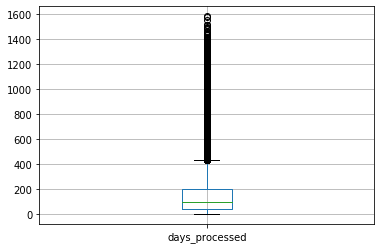

In [343]:
# диаграмма размаха по параметру "время продаж"
df.boxplot(column='days_processed')
plt.show()

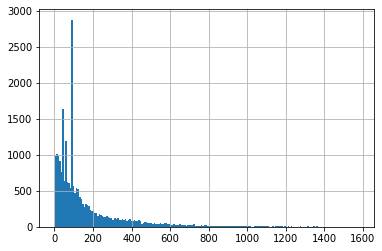

In [344]:
# гистограмма по параметру "время продаж"
df['days_processed'].hist(bins=200)

In [345]:
d_q1 = d_descr['25%'] # нижний квартиль
d_med = d_descr['50%'] # медиана
d_q2 = d_descr['75%'] # верхний квартиль
d_iqr = d_descr['75%']-d_descr['25%'] # межквартильный размах
d_high = d_q2 + d_iqr*1.5 # верхняя граница диаграммы размаха
d_high

432.5

#### Первоначальные выводы по параметру "время продажи"

Для анализа данных использовали числовое описание, диаграмму размаха и гистограмму.  
Медианное значение равно 95 дням, среднее - 170.  
Обычно продажа занимает от 45 до 200 дней (т.е. от нижнего квартиля до верхнего).  
При сроках продажи до 45 дней можно говорить о быстрой продаже - только 25% всех наблюдений укладываются в эти значения.  
Сроки продажи более 200 дней являются необычно долгими - 75% всех объектов продаются до этого срока.  
Нижняя граница диаграммы размаха упирается в значение 1. Верхняя граница равна 433. Более высокие значения будем считать выбросом (но их много).

Заметно резкое увеличения количеств продаж в районе медианы времени. Это объясняется тем, что изначально в базе данных отсутствовала информация о времени продажи для 13% наблюдений, и эти пропуски были заменены на медианные значения соответсвующих населенных пунктов. Чтобы подтвердить это предположение, ниже сравним гистограммы оригинального времени продаж и с заполненными пропусками.  
Также бросаются в глаза 2 пика в районе первого квартиля. Ниже выясним причину их появления.

#### Редкие и выбивающиеся значения параметра "время продажи".  

Редкими будем считать значения, лежащие за пределами диаграммы размаха.  
Выбивающиемися - значения , искажающие гистограмму.

In [346]:
# доля редких значений
days_outlier = df[df['days_processed']>d_high]['days_processed'].count()
days_total = df['days_processed'].count()
print('Доля редких значений сроков продаж:{:.1%}'.format(days_outlier/days_total))

Доля редких значений сроков продаж:9.7%


Теперь проанализируем причину появления выбивающихся значений сроков продаж.

In [347]:
# числовое описание необработанных 'days_exposition', т.е. на основе фактических данных 
# с пустыми пропусками
days_orig_descr = df['days_exposition'].describe()
days_orig_descr

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [348]:
# ...и сравнение с обработанным числовым описанием по СПб (медианы вместо пропусков)
comp1 = pd.concat([days_orig_descr, d_descr], axis=1)
comp1.columns = ['original','processed']
comp1

,original,processed
count,20470.000000,23618.000000
mean,180.753200,170.090757
std,219.777916,207.131707
min,1.000000,1.000000
25%,45.000000,45.000000
50%,95.000000,95.000000
75%,231.000000,200.000000
max,1580.000000,1580.000000


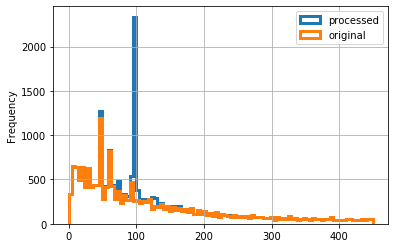

In [349]:
# сравнение гистограмм (ограничено по верхней границе диаграммы размаха):
df['days_processed'].plot(kind='hist', y='days_processed', histtype='step', range=(0, 450), bins=100, linewidth=3, alpha=1, label='processed', legend=True)
df['days_exposition'].plot(kind='hist', y='days_exposition', histtype='step', range=(0, 450), bins=100, linewidth=3, alpha=1, label='original', legend=True, grid=True)

Как видно из гистограмм, наложенных друг на друга, замена пропусков на медианные значения может привести к значительному искажению гистограммы. А числовое описание изменилось некритично.  
В то же время 2 пика в районе первого квартиля присутствуют и на гистограмме необработанных значений.

Исследуем причину появления двух пиков в районе значений 40-70 дней.

In [350]:
# населенные пункты с наибольшим количеством объявлений
df.groupby('loc_name').count().sort_values(by='total_area', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,days_processed,per_sqm,weekday,weekday_nr,month_nr,year,level,liv/tot_ratio,kitch/tot_ratio
loc_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Санкт-Петербург,15721,15721,15721,15721,15721,10104,15651,15721,15721,15721,15721,15721,15721,15721,15721,15636,15660,15721,7284,15721,7983,13638,15721,14888,15721,15721,15721,15721,15721,15721,15721
Мурино,590,590,590,590,590,228,586,590,590,590,590,590,590,590,590,2,2,590,0,590,2,551,590,590,590,590,590,590,590,590,590
Кудрово,472,472,472,472,472,195,470,472,472,472,472,472,472,472,472,0,0,472,0,472,0,441,472,472,472,472,472,472,472,472,472
Шушары,440,440,440,440,440,217,439,440,440,440,440,440,440,440,440,436,436,440,0,440,152,408,440,440,440,440,440,440,440,440,440
Всеволожск,398,398,398,398,398,272,398,398,398,398,398,398,398,398,398,0,0,398,0,398,0,339,398,397,398,398,398,398,398,398,398


Как видно, кроме СПб, населенные пункты по отдельности не могут изменить общую картину. Поэтому будем рассматривать влияние на общую гистограмму 1)СПб и 2)всей Ленобласти.

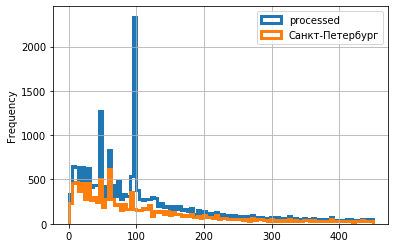

In [351]:
# сравнение общей гистограммы и оригинальной гистограммы СПб
df['days_processed'].plot(kind='hist', y='days_processed', histtype='step', range=(0, 450), bins=100, linewidth=3, alpha=1, label='processed', legend=True)
df[df['loc_name']=='Санкт-Петербург']['days_exposition'].plot(kind='hist', y='days_exposition', histtype='step', range=(0, 450), bins=100, linewidth=3, alpha=1, label='Санкт-Петербург', legend=True, grid=True)

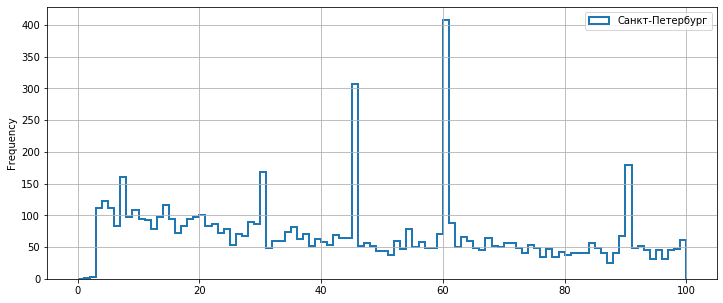

In [352]:
# гистограмма СПб для участка 1-100 дней
df.query('loc_name == "Санкт-Петербург"')['days_exposition'].plot(kind='hist', y='days_exposition', histtype='step', range=(0, 100), bins=100, linewidth=2, alpha=1, label='Санкт-Петербург', legend=True, grid=True, figsize=(12,5))

In [428]:
# список значений на участке 1-100
df.query('loc_name == "Санкт-Петербург"' and 'days_exposition < 100').pivot_table(index='days_processed', values='days_exposition', aggfunc='count')

,days_exposition
days_processed,
1.0,1
2.0,3
3.0,158
4.0,174
5.0,152
6.0,124
7.0,234
8.0,139
9.0,142


Как видно из гистограммы и списка, значения количества продаж в сроки 7, 30, 45, 60, 90 очень резко выбиваются из последовательного ряда. Логично сделать вывод, что это не реальные сроки, а округленные значения (неделя, месяц, полтора месяца, два, три).

Проведем такой же анализ для Ленобласти.

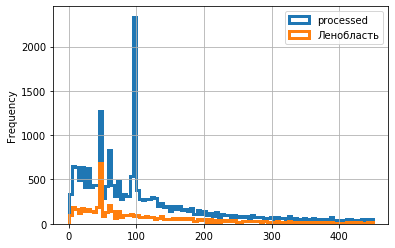

In [354]:
df['days_processed'].plot(kind='hist', y='days_processed', histtype='step', range=(0, 450), bins=100, linewidth=3, alpha=1, label='processed', legend=True)
df[df['loc_name']!='Санкт-Петербург']['days_exposition'].plot(kind='hist', y='days_exposition', histtype='step', range=(0, 450), bins=100, linewidth=3, alpha=1, label='Ленобласть', legend=True, grid=True)

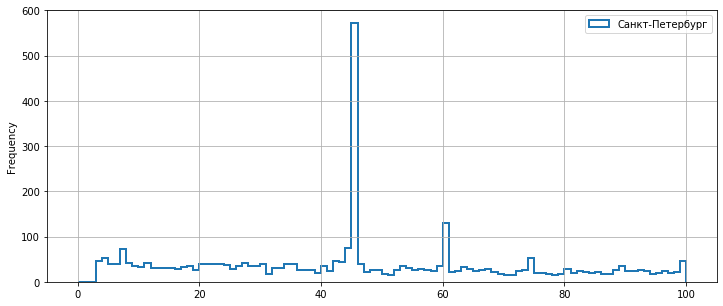

In [355]:
# гистограмма Ленобласть для участка 1-100 дней
df.query('loc_name != "Санкт-Петербург"')['days_exposition'].plot(kind='hist', y='days_exposition', histtype='step', range=(0, 100), bins=100, linewidth=2, alpha=1, label='Санкт-Петербург', legend=True, grid=True, figsize=(12,5))

In [356]:
# список значений на участке 1-100
df.query('loc_name != "Санкт-Петербург"' and 'days_exposition < 100').pivot_table(index='days_processed', values='days_exposition', aggfunc='count')

,days_exposition
days_processed,
1.0,1
2.0,3
3.0,158
4.0,174
5.0,152
6.0,124
7.0,234
8.0,139
9.0,142


Аналогично, в базе данных по срокам продаж в Ленобласти имеются выделяющиеся значения, совпадающие с календарными периодами: 7, 45, 60 и 74 дня (неделя, полтора месяца, два, два с половиной).

#### Выводы по изучению редких и выбивающиеся значения параметра "время продажи"  

Редкие значения, т.е. не попадающие в границы диаграммы размаха составляют 9.7% от всех наблюдений.

Выбивающиеся значения появились по двум причинам:  
1. На стадии составления базы данных - округление фактических значений до календарных периодов неделя, месяц, полтора месяца, два, два с половиной и три.  
2. На стадии предобработки данных - замена пропущенных значений на медианные.

### Выводы по изучению параметра "время продажи"
Медианное значение равно 95 дням, среднее - 170.
Обычно продажа занимает от 45 до 200 дней. При сроках продажи до 45 дней можно говорить о быстрой продаже - только 25% всех наблюдений укладываются в эти значения. Сроки продажи более 200 дней являются необычно долгими - 75% всех объектов продаются до этого срока.   
Редкие значения, т.е. не попадающие в границы диаграммы размаха, составляют 9.7% от всех наблюдений.   
Выбивающиеся значения появились по двум причинам:   
-округление фактических значений до календарных периодов неделя, месяц, полтора месяца, два, два с половиной и три (на стадии составления базы данных);   
-замена пропущенных значений на медианные(на стадии предобработки данных).

### Шаг 4bb. Удаление выбросов

В многих случах причиной выброса может являться опечатка при вводе данных в базу (высота потолка 1 м, например). Но в некоторых случаях это действительно редкие, хотя и реальные, значения.   
Чтобы не потерять чрезмерное количество данных заменим выбросы на пропуски, но сами строки оставим. Заодно посчитаем количество выбросов.

In [357]:
# добавим в список параметров время продажи
features.append('days_processed')
print(features)

['total_area', 'per_sqm', 'rooms', 'ceiling_height', 'days_processed']


In [358]:
import numpy

In [359]:
# посчитаем и удалим выбросы
columns_ol=['Параметр','Выбросы', 'Процент выбросов от числа наблюдений', 'Пропуски после удаления выбросов']
data_ol=[]
for ff in features:
    ff_descr = df[ff].describe()
    ff_iqr = ff_descr['75%'] - ff_descr['25%']
    ff_low = ff_descr['25%'] - ff_iqr*1.5
    ff_high = ff_descr['75%'] + ff_iqr*1.5
    if ff_low < ff_descr['min']:
        ff_low = ff_descr['min']
    if ff_high > ff_descr['max']:
        ff_high = ff_descr['max']
    ol_sum = df[(df[ff]<ff_low)|(df[ff]>ff_high)][ff].count()
    df.loc[((df[ff]<ff_low)|(df[ff]>ff_high)), ff]=numpy.nan
    line_ol = [ff, ol_sum, '{:.1%}'.format(ol_sum/df.shape[0]), df[ff].isna().sum()]
    data_ol.append(line_ol)
ol_summary=pd.DataFrame(data=data_ol, columns=columns_ol)
ol_summary

,Параметр,Выбросы,Процент выбросов от числа наблюдений,Пропуски после удаления выбросов
0,total_area,1244,5.3%,1244
1,per_sqm,434,1.8%,1278
2,rooms,90,0.4%,90
3,ceiling_height,826,3.5%,9986
4,days_processed,2297,9.7%,2329


Действительно, было бы неверно удалить 10% наблюдений...

### Шаг 4c. Факторы, влияющие на стоимость квартиры (цену квадратного метра)

#### Зависимость цены квадратного метра от общей площади

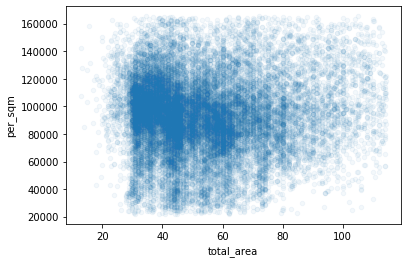

In [360]:
# точечный график
df.query('total_area <= @tot_area_high and per_sqm <= 1.5*@spb_high').plot(x='total_area', y='per_sqm', kind='scatter', alpha=0.05)

Зависимость видна, но удобнее будет перейти к линейному графику зависимости медианы цены кв.м от общей площади.

In [361]:
# вычислим медианы цены кв.м в зависимости от общей площади
columns4 = ['total_area', 'per_sqm_med']
data4 = []
for i in [20,30,40,50,60,70,80,90,100,110]:
    ilow = i-5
    ihigh = i+5
    tot_area_med = df[(df['total_area']>ilow)&(df['total_area']<=ihigh)]['per_sqm'].median()
    line4 = [i,tot_area_med]
    data4.append(line4)
data_tot_area_med = pd.DataFrame(data=data4, columns=columns4)
data_tot_area_med

,total_area,per_sqm_med
0,20,104000.0
1,30,98397.0
2,40,94875.0
3,50,90215.0
4,60,86770.5
5,70,91036.0
6,80,93105.0
7,90,97230.0
8,100,102604.0
9,110,108491.0


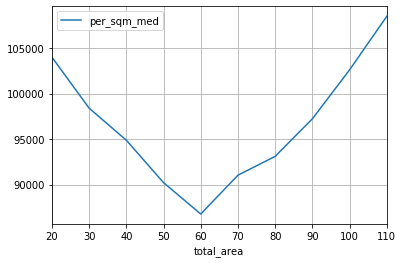

In [362]:
# график зависимости медианы цены кв.м от общей площади
data_tot_area_med.plot(x='total_area', y='per_sqm_med', grid=True)

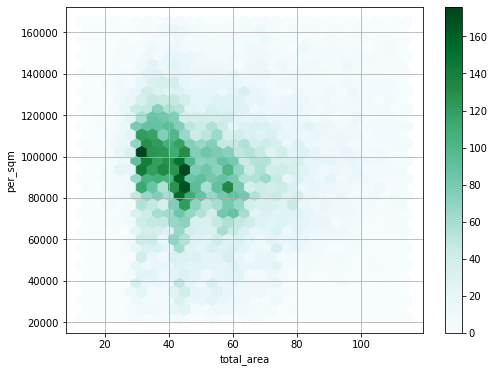

In [363]:
# ячеистая диаграмма
df.query('total_area <= @tot_area_high and per_sqm <= @spb_high').plot(x='total_area', y='per_sqm', kind='hexbin', gridsize=30, figsize=(8, 6), sharex=False, grid=True)

Коэффициент корреляции стоимости квадратного метра и общей площади вычислим по медианным значениям цены кв.м.

In [364]:
# коэффициент корреляции стоимости квадратного метра и общей площади
data_tot_area_med['per_sqm_med'].corr(data_tot_area_med['total_area'])

0.2542529056709147

In [365]:
# коэффициент корреляции стоимости квадратного метра и общей площади <=60 кв.м
data_tot_area_med['per_sqm_med'].corr(data_tot_area_med[data_tot_area_med['total_area']<=60]['total_area'])

-0.9966064451572201

In [366]:
# коэффициент корреляции стоимости квадратного метра и общей площади >=60 кв.м
data_tot_area_med['per_sqm_med'].corr(data_tot_area_med[data_tot_area_med['total_area']>=60]['total_area'])

0.9887659896358911

По линейному графику видно,что зависимость цены кв.м от площади отрицательная для квартир площадью менее 60 кв.м (коэффициент корреляции Пирсона = -1.00), но положительная для бОльших квартир (коэф.корр. = +0.99). В целом коэффициент корреляции Пирсона невелик: +0.25, что можно объяснить нелинейным характером связи между значениями.
Ячеистая диаграмма показывает, что в основном в базе представлены квартиры площадью до 60 кв.м. На ячеистой диаграмме тоже заметна отрицательная зависимость цены кв.м от общей площади при площади менее 60 кв.м. 

#### Зависимость цены квадратного метра от числа комнат

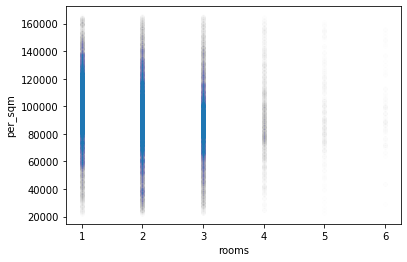

In [367]:
# точечный график
df.query('rooms <= 6 and per_sqm <= @spb_high').plot(x='rooms', y='per_sqm', kind='scatter', alpha=0.0025)

Зависимость видна, но удобнее будет перейти к линейному графику зависимости медианы цены кв.м от количества комнат.

In [368]:
# вычислим медианы цены кв.м в зависимости от количества комнат
columns3 = ['rooms', 'per_sqm_med']
data3 = []
for i in range(1,7):
    rooms_med = df[df['rooms']==i]['per_sqm'].median()
    line3 = [i,rooms_med]
    data3.append(line3)
data_rooms_med = pd.DataFrame(data=data3, columns=columns3)
data_rooms_med

,rooms,per_sqm_med
0,1,100000.0
1,2,92000.0
2,3,87692.0
3,4,89100.5
4,5,90076.0
5,6,94297.5


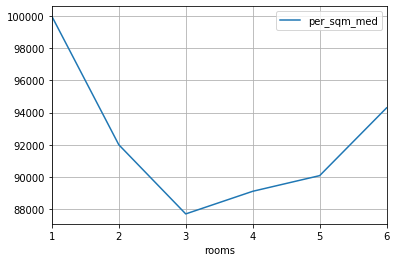

In [369]:
# график зависимости медианы цены кв.м от количества комнат
data_rooms_med.plot(x='rooms', y='per_sqm_med', grid=True)

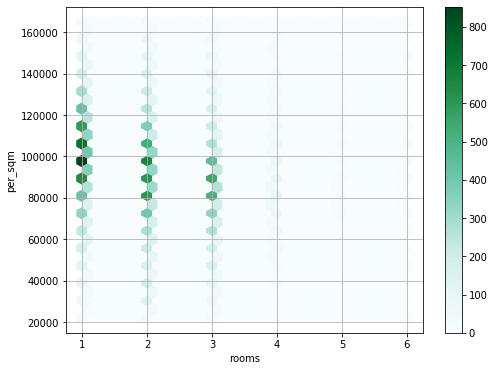

In [370]:
# ячеистая диаграмма
df.query('rooms <= 6 and per_sqm <= @spb_high').plot(x='rooms', y='per_sqm', kind='hexbin', gridsize=30, figsize=(8, 6), sharex=False, grid=True)

In [371]:
# коэффициент корреляции
data_rooms_med['per_sqm_med'].corr(data_rooms_med['rooms'])

-0.39349531924887754

In [372]:
# коэффициент корреляции для 1-3 комнатных квартир
data_rooms_med['per_sqm_med'].corr(data_rooms_med[data_rooms_med['rooms']<=3]['rooms'])

-0.9853323869815767

In [373]:
# коэффициент корреляции для 3-6 комнатных квартир
data_rooms_med['per_sqm_med'].corr(data_rooms_med[data_rooms_med['rooms']>=3]['rooms'])

0.9437200497256104

По линейному графику видно,что зависимость цены кв.м от числа комнат отрицательная для квартир с числом комнат 1-3 (коффициент корреляции = -0.99), но положительная для бОльших квартир (кщэф.корр. = +0.94). В целом коэффициент корреляции Пирсона невелик и равен -0.39, что можно объяснить нелинейный характером связи между значениями. 
Ячеистая диаграмма показывает, что в основном в базе представлены 1-3-комнатные квартиры. На ячеистой диаграмме тоже заметна отрицательная зависимость цены кв.м от числа комнат для 1-3-комнатных квартир.  

Представляется, причин такой картины две:   
-многокомнатных квартир очень мало на рынке,   
-значительную часть многокомнатных квартир составляют объекты, дорогие в силу статуса жилого комплекса или района.

#### Зависимость цены квадратного метра от удаленности от центра

In [374]:
# примем за границы населенного пункта расстояние 30 км от центра (СПб и пригороды)
xmax1 = 30

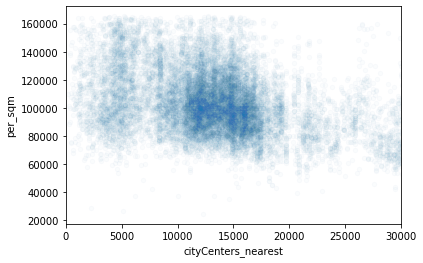

In [375]:
# точечный график
df.query('per_sqm <= @spb_high').plot(x='cityCenters_nearest', y='per_sqm', kind='scatter', alpha=0.02, xlim=(0,xmax1*1000))

Зависимость видна, но удобнее будет перейти к линейному графику зависимости медианы цены кв.м от расстояния до центра.

In [376]:
# вычислим медианы цены кв.м в зависимости от расстояния до центра (дискретность 1 км)
columns5 = ['distance_km', 'per_sqm_med']
data5 = []
for i in range(0,xmax1):
    ilow = i*1000-500
    ihigh = i*1000+500
    dist_med = df[(df['cityCenters_nearest']>ilow)&(df['cityCenters_nearest']<=ihigh)]['per_sqm'].median()
    line5 = [i,dist_med]
    data5.append(line5)
data_dist_med = pd.DataFrame(data=data5, columns=columns5)

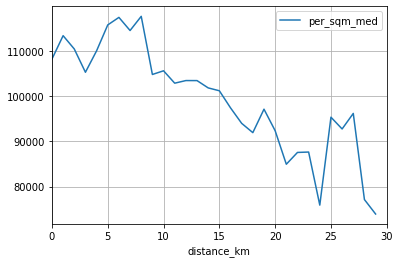

In [377]:
# график зависимости медианы цены кв.м от месяца расстояние до центра, ограничим расстояние 30 км
data_dist_med.plot(x='distance_km', y='per_sqm_med', grid=True, xlim=(0,xmax1))

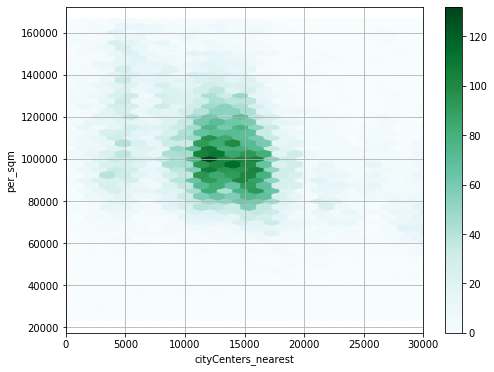

In [378]:
# ячеистая диаграмма
df.query('per_sqm <= @spb_high').plot(x='cityCenters_nearest', y='per_sqm', kind='hexbin', gridsize=50, figsize=(8, 6), sharex=False, grid=True, xlim=(0,xmax1*1000))

In [379]:
# коэффициент корреляции
data_dist_med['per_sqm_med'].corr(data_dist_med['distance_km'])

-0.8729087637906758

По точечному и линейному графикам видно, что цена зависит от расстояния до центра. Зависимость обратная.  
Ячеистая диаграмма показывает, что большая часть объектов базы данных расположена в 10-18 км от центра и имеет стоимость 80-125 т.р. за кв.м.  
Коэффициент корреляции Пирсона = -0.87.

#### Зависимость цены квадратного метра от этажа

In [380]:
# переведем обозначение уровня этажа в цифровой вид
# (первый - 1, последний - 3, другой - 2):
def level_nr(z):
    if z=='первый':
        return 1
    if z=='другой':
        return 2
    return 3
df['level_nr'] = df['level'].apply(level_nr)

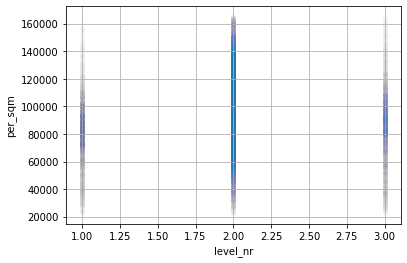

In [381]:
# точечный график
df.query('per_sqm <= @spb_high').plot(x='level_nr', y='per_sqm', kind='scatter', alpha=0.002, grid=True)

Зависимость видна, но не четко. Рассчитаем медианы.

In [382]:
# вычислим медианы цены кв.м категории этажа
columns0 = ['level', 'per_sqm_med']
data0 = []
for i in ['первый','другой','последний']:
    level_med = df[df['level']==i]['per_sqm'].median()
    line0 = [i,level_med]
    data0.append(line0)
data_level_med = pd.DataFrame(data=data0, columns=columns0)
data_level_med

,level,per_sqm_med
0,первый,81296.0
1,другой,96970.0
2,последний,86706.5


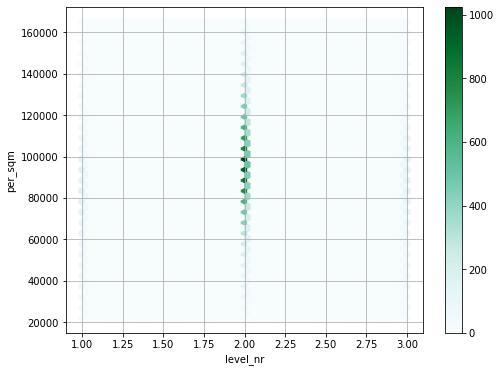

In [383]:
# ячеистая диаграмма
df.query('per_sqm <= @spb_high').plot(x='level_nr', y='per_sqm', kind='hexbin', gridsize=50, figsize=(8, 6), sharex=False, grid=True)

In [384]:
# коэффициент корреляции
df['per_sqm'].corr(df['level_nr'])

0.04024500142210969

При внимательном рассмотрении точечный график показывает, и расчеты медиан подтверждают, что "не первый и не последний" (промежуточный) этаж является самым дорогим, а первый этаж - самым дешевым.
По ячеистой диаграмме видно, что абсолютное большенство объектов расположено на промежуточных этажах и предлагается по цене 80-120 т.р. за кв.м.   
Коэффициент корреляции неприменим из-за нелинейного характера зависимости.

#### Зависимость цены квадратного метра от дня недели размещения объявления

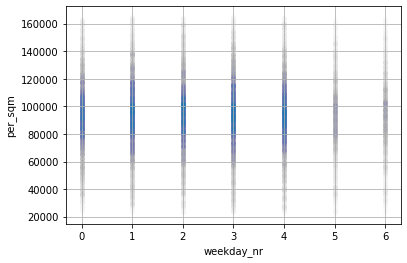

In [385]:
# точечный график
df.query('per_sqm <= @spb_high').plot(x='weekday_nr', y='per_sqm', kind='scatter', alpha=0.005, grid=True)

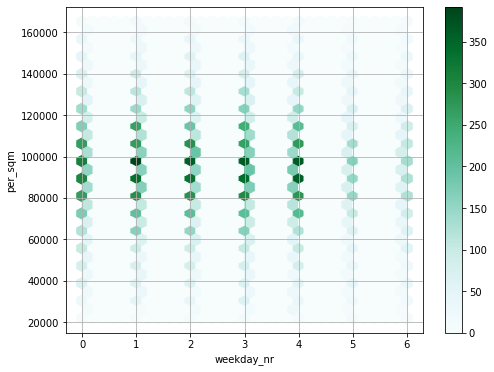

In [386]:
# ячеистая диаграмма
df.query('per_sqm <= @spb_high').plot(x='weekday_nr', y='per_sqm', kind='hexbin', gridsize=30, figsize=(8, 6), sharex=False, grid=True)

In [387]:
# коэффициент корреляции
df['per_sqm'].corr(df['weekday_nr'])

-0.009005876508210315

Цена не зависит от дня недели размещения объявления. Но заметно, что количество объявлений, размещенных в субботу и воскресенье меньше.

#### Зависимость цены квадратного метра от месяца размещения объявления

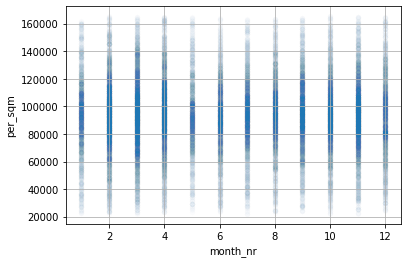

In [388]:
# точечный график
df.query('per_sqm <= @spb_high').plot(x='month_nr', y='per_sqm', kind='scatter', alpha=0.01, grid=True)

In [389]:
# вычислим медианы цены кв.м по месяцам
columns = ['month_nr', 'per_sqm_med']
data1 = []
for i in range(1,13):
    month_med = df[df['month_nr']==i]['per_sqm'].median()
    line = [i,month_med]
    data1.append(line)
data_month_med = pd.DataFrame(data=data1, columns=columns)
data_month_med

,month_nr,per_sqm_med
0,1,93988.5
1,2,93851.0
2,3,94107.0
3,4,95206.5
4,5,91999.0
5,6,91818.0
6,7,93976.0
7,8,95000.0
8,9,94329.0
9,10,93333.0


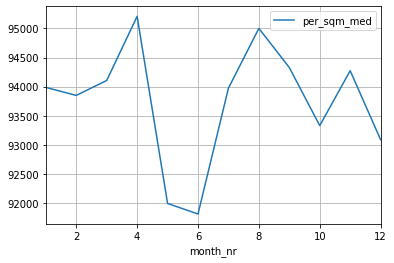

In [390]:
# график зависимости медианы цены кв.м от месяца размещения объявления
data_month_med.plot(x='month_nr', y='per_sqm_med', grid=True)

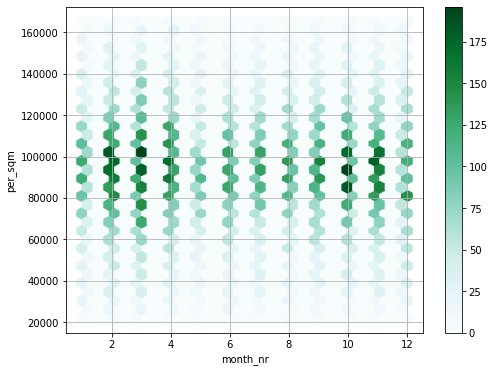

In [391]:
# ячеистая диаграмма
df.query('per_sqm <= @spb_high').plot(x='month_nr', y='per_sqm', kind='hexbin', gridsize=30, figsize=(8, 6), sharex=False, grid=True)

In [392]:
# коэффициент корреляции
data_month_med['per_sqm_med'].corr(data_month_med['month_nr'])

-0.056978458660761996

Цена слабо зависит от месяца размещения объявления: по линейному графику видно, что лишь в мае цена ниже среднегодовой, и то всего на 2%.
По ячеистой диаграмме можно сделать вывод, что в мае подается наименьшее количество объявлений.
Коэффициент корреляции ожидаемо стремится к нулю.

#### Зависимость цены квадратного метра от года размещения объявления 

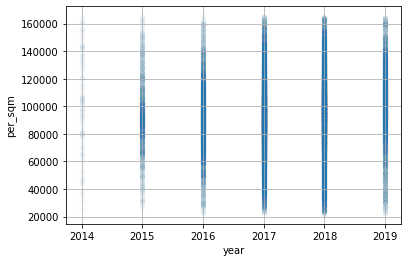

In [393]:
# точечный график
df.query('per_sqm <= @spb_high').plot(x='year', y='per_sqm', kind='scatter', alpha=0.02, grid=True)

In [394]:
# вычислим медианы цены кв.м по годам
columns2 = ['year', 'per_sqm_med']
data2 = []
year_list = df['year'].unique()
for i in year_list:
    y_med = df[df['year']==i]['per_sqm'].median()
    line2 = [i,y_med]
    data2.append(line2)
data_year_med = pd.DataFrame(data=data2, columns=columns2).sort_values(by='year')
data_year_med

,year,per_sqm_med
5,2014,104341.5
2,2015,91569.0
4,2016,90698.0
3,2017,91379.0
1,2018,94965.5
0,2019,101831.0


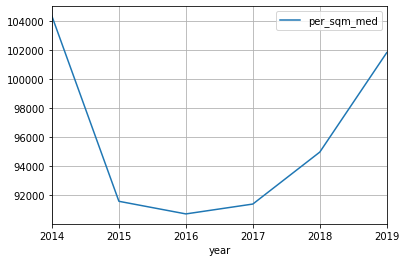

In [395]:
# график зависимости медианы цены кв.м от года размещения объявления
data_year_med.plot(x='year', y='per_sqm_med', grid=True)

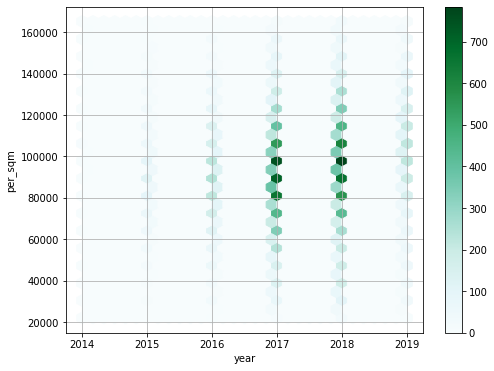

In [396]:
# ячеистая диаграмма
df.query('per_sqm <= @spb_high').plot(x='year', y='per_sqm', kind='hexbin', gridsize=30, figsize=(8, 6), sharex=False, grid=True)

In [397]:
# коэффициент корреляции
data_year_med['per_sqm_med'].corr(data_year_med['year'])

-0.015262399082830095

In [398]:
# коэффициент корреляции в 2014-2016 годах
data_year_med['per_sqm_med'].corr(data_year_med[data_year_med['year']<=2016]['year'])

-0.8931250768561276

In [399]:
# коэффициент корреляции в 2016-2019 годах
data_year_med['per_sqm_med'].corr(data_year_med[data_year_med['year']>=2016]['year'])

0.9366248843357182

Цена зависит от года размещения объявления: по линейному графику видно, что максимум был в 2014 году, в 2015-2016 цена кв.м была значительна ниже, после чего появилась тенденция к росту по экспоненте.   
Коэффициент корреляции в 2014-2016 г. = -0.89, в 2016-2019г. = +0.94. Общий коэф.корр. =-0.02, что объясняется нелинейным характером зависимости.   
По ячеистой диаграмме можно сделать вывод, что в 2017-2018 годах было размещено наибольшее количество объявлений.  

### Вывод по факторам, влияющим на стоимость кв.м квартиры

Общая площадь.  
Зависимость отрицательная при площади до 60 кв.м, свыше - положительная. Коэффициент корреляции стремится к 1.

Число комнат.
Зависимость отрицательная при количестве комнат 1-3, свыше - положительная. Коэффициент корреляции стремится к 1 (при расчете для каждого среза по отдельности).

Расстояние до центра города.
Зависимость отрицательная, выражена очень хорошо. Коэф.корреляции = -0.87.

Этаж.
Самый дорогой этаж - не первый и не последний. Самый дешевый - первый. Зависимость выражена очень хорошо.

День недели размещения объявления.
Нет зависимости.

Месяц размещения объявления.
В объявлениях, размещенных в мае, цена незначительно (на 2%) ниже среднегодовой.

Год размещения объявления.
Максимум был в 2014 году, в 2015-2016 цена кв.м была значительна ниже, после чего появилась тенденция к росту по экспоненте. Зависимость явная.
Корреляция отрицательная в 2014-2016 г., положительная в 2016-2019. Коэффициент корреляции около 0.9.

Таким образом, на цену квадратного метра более всего влияют:  
- расстояние до центра города,
- этаж (первый, последний, другой),
- общая площадь и число комнат,
- год размещения объявления.

### Шаг 4d. 10 населённых пунктов с наибольшим числом объявлений

In [400]:
# создадим датафрейм 10 населённых пунктов с наибольшим числом объявлений с указанием названия,
# количества объявлений и средней цены кв.м
namelist = df['loc_name'].unique()
namelist
columns7 = ['loc_name', 'offers', 'mean_per_sqm']
data7 = []
for i in namelist:
    offers = df[df['loc_name']==i]['last_price'].count()
    mean_per_sqm = df[df['loc_name']==i]['per_sqm'].mean()
    line7 = [i,offers, mean_per_sqm]
    data7.append(line7)
offers_list = pd.DataFrame(data=data7, columns=columns7).sort_values(by='offers', ascending=False).head(10).reset_index(drop=True)
offers_list['mean_per_sqm']=offers_list['mean_per_sqm'].astype('int64')
offers_list

,loc_name,offers,mean_per_sqm
0,Санкт-Петербург,15721,105789
1,Мурино,590,86087
2,Кудрово,472,95324
3,Шушары,440,78677
4,Всеволожск,398,67214
5,Пушкин,369,101607
6,Колпино,338,75424
7,Парголово,327,90175
8,Гатчина,307,69294
9,Выборг,237,58308


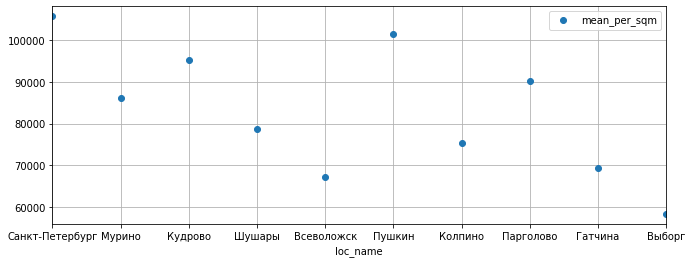

In [401]:
# график зависимости цены от местоположения
offers_list.plot(style='o', x='loc_name', y='mean_per_sqm', grid=True, figsize=(11,4))

In [402]:
# выделем населённые пункты с самой высокой и самой низкой стоимостью жилья
max_mps = offers_list['mean_per_sqm'].max()
min_mps = offers_list['mean_per_sqm'].min()
offers_list.query('mean_per_sqm == @max_mps or mean_per_sqm == @min_mps')

,loc_name,offers,mean_per_sqm
0,Санкт-Петербург,15721,105789
9,Выборг,237,58308


### Шаг 4e. Центр Санкт-Петербурга в сравнении с городом и областью в целом

#### Определение центра СПб: цена квартир в зависимости от удаленности от центра

In [403]:
# создадим датафрейм, содержащий информацию только по СПб
SPb = df.query('loc_name == "Санкт-Петербург"').reset_index(drop=True)
SPb['cityCenters_nearest'] = (SPb['cityCenters_nearest']/1000).round(0)
SPb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,loc_name,days_processed,per_sqm,weekday,weekday_nr,month_nr,year,level,liv/tot_ratio,kitch/tot_ratio,level_nr
0,20,13000000.0,108.0,2019-03-07,3.0,2.70,16.0,51.000000,8,True,False,False,25.000,0.0,Санкт-Петербург,18863.0,16.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,95.0,120370.0,чт,3,3,2019,другой,0.47,0.23,2
1,10,5196000.0,56.0,2015-08-20,2.0,NaN,5.0,34.300000,4,True,False,False,8.300,0.0,Санкт-Петербург,21741.0,14.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,NaN,92786.0,чт,3,8,2015,другой,0.61,0.15,2
2,0,64900000.0,NaN,2015-07-24,3.0,NaN,14.0,91.730769,9,True,False,False,27.825,0.0,Санкт-Петербург,28098.0,7.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,424.0,NaN,пт,4,7,2015,другой,0.58,0.18,2
3,2,10000000.0,100.0,2018-06-19,2.0,3.03,14.0,32.000000,13,True,False,False,41.000,0.0,Санкт-Петербург,31856.0,8.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,121.0,100000.0,вт,1,6,2018,другой,0.32,0.41,2
4,5,7915000.0,71.6,2019-04-18,2.0,NaN,24.0,41.307692,22,True,False,False,18.900,2.0,Санкт-Петербург,23982.0,12.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург,95.0,110545.0,чт,3,4,2019,другой,0.58,0.26,2


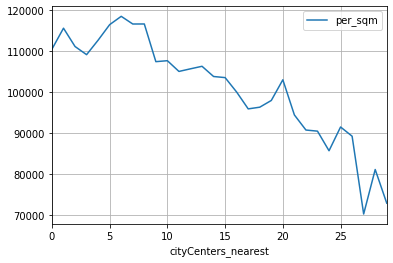

In [404]:
# график зависимости средней цены от расстояния до центра
SPb.pivot_table(index='cityCenters_nearest', values='per_sqm').plot(y='per_sqm',grid=True)

Исходя из формы графика примем за центральный район города локацию в пределах 5 км от центра.

In [405]:
# выделем сегмент квартир, находящихся в центре СПб
cr = SPb.query('cityCenters_nearest <=5').reset_index(drop=True)
cr.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,loc_name,days_processed,per_sqm,weekday,weekday_nr,month_nr,year,level,liv/tot_ratio,kitch/tot_ratio,level_nr
0,8,6500000.0,97.2,2015-10-31,2.0,NaN,3.0,46.5,1,True,False,False,19.6,0.0,Санкт-Петербург,20052.0,2.0,3.0,411.0,3.0,124.0,265.0,Санкт-Петербург,265.0,66872.0,сб,5,10,2015,первый,0.48,0.20,1
1,6,15500000.0,NaN,2017-06-26,5.0,NaN,5.0,104.0,4,True,False,False,17.0,0.0,Санкт-Петербург,23670.0,4.0,0.0,NaN,1.0,779.0,644.0,Санкт-Петербург,NaN,104027.0,пн,0,6,2017,другой,0.70,0.11,2
2,18,7990000.0,74.0,2017-08-24,2.0,NaN,4.0,43.0,4,True,False,False,20.0,0.0,Санкт-Петербург,22568.0,4.0,1.0,363.0,0.0,NaN,609.0,Санкт-Петербург,NaN,107973.0,чт,3,8,2017,последний,0.58,0.27,3
3,2,20000000.0,NaN,2018-09-11,3.0,3.0,9.0,68.0,7,True,False,False,16.0,0.0,Санкт-Петербург,26055.0,5.0,1.0,648.0,1.0,779.0,37.0,Санкт-Петербург,37.0,NaN,вт,1,9,2018,другой,0.58,0.14,2
4,32,9600000.0,90.0,2017-09-26,4.0,NaN,5.0,67.0,2,True,False,False,8.0,0.0,Санкт-Петербург,23277.0,3.0,0.0,NaN,0.0,NaN,104.0,Санкт-Петербург,104.0,106667.0,вт,1,9,2017,другой,0.74,0.09,2


#### Сравнение параметров  центра СПб с базой данных в целом

#### Общая площадь

In [406]:
# числовое описание по параметру "общая площадь" центра СПб
cr_tot_area_descr = cr['total_area'].describe()

In [407]:
# сравнение числового описания по параметру "общая площадь" центра СПб и всей базы данных в целом 
comp_area = pd.concat([cr_tot_area_descr, tot_area_descr], axis=1)
comp_area.columns = ['TOTAL_AREA___center','general']
comp_area

,TOTAL_AREA___center,general
count,1900.000000,23650.000000
mean,71.729337,60.329069
std,22.459790,35.661808
min,12.000000,12.000000
25%,54.950000,40.000000
50%,71.000000,52.000000
75%,90.000000,69.700000
max,114.200000,900.000000


В центре в среднем предлагаются квартиры гораздо большей площади.

#### Цена квадратного метра

In [408]:
# числовое описание по параметру "цена квадратного метра" центра СПб
cr_descr=cr['per_sqm'].describe()

In [409]:
# сравнение числового описания цены кв.м центра СПб, всего СПб и отдельно Ленобласти 
comp_sqm = pd.concat([cr_descr, spb_descr, lo_descr], axis=1)
comp_sqm.columns = ['PER_SQM___center','spb', 'lenoblast']
comp_sqm

,PER_SQM___center,spb,lenoblast
count,1998.000000,1.572100e+04,7918.000000
mean,113524.383383,1.148490e+05,68607.204345
std,24586.333954,5.258452e+04,24491.718538
min,26250.000000,1.120000e+02,7963.000000
25%,94130.250000,9.090900e+04,51864.750000
50%,111111.000000,1.047620e+05,68692.500000
75%,132059.500000,1.244390e+05,84968.500000
max,165238.000000,1.907500e+06,168707.000000


Стоимость кв.м в центре на 6% больше, чем в целом по СПб, и на 38%, чем по Ленинградской области.

#### Количество комнат

In [410]:
# числовое описание параметра "число комнат" центра СПб
cr_rooms_descr=cr['rooms'].describe()

In [411]:
# сравнение числового описания параметра "число комнат" центра СПб и всей базы данных в целом 
comp_rooms = pd.concat([cr_rooms_descr, rooms_descr], axis=1)
comp_rooms.columns = ['ROOMS___center','general']
comp_rooms

,ROOMS___center,general
count,2426.000000,23650.000000
mean,2.843776,2.079027
std,1.223109,1.066666
min,1.000000,1.000000
25%,2.000000,1.000000
50%,3.000000,2.000000
75%,4.000000,3.000000
max,6.000000,19.000000


В центре чаще предлагаются квартиры с бОльшим числом комнат.

#### Высота потолков

In [412]:
# числовое описание параметра "высота потолков" центра СПб
cr_ch_descr=cr['ceiling_height'].describe()

In [413]:
# сравнение числового описания параметра "высота потолков" центра СПб и всей базы данных в целом 
comp_ch = pd.concat([cr_ch_descr, ch_descr], axis=1)
comp_ch.columns = ['CEILING___center','general']
comp_ch

,CEILING___center,general
count,1093.000000,14490.000000
mean,2.946871,2.771287
std,0.186198,1.261593
min,2.400000,1.000000
25%,2.800000,2.520000
50%,3.000000,2.650000
75%,3.100000,2.800000
max,3.210000,100.000000


 В центре в среднем предлагаются квартиры с высоким потолком (3.0м), а в общем случае - стандартной высоты 2,65м.

#### Выводы по сравнению параметров  центра СПб с базой данных в целом

В центре в среднем предлагаются квартиры большей площади и с бОльшим количеством комнат.   
Высота потолка квартир в центре - в среднем 3.1м, при общем показателе по городу и области 2.65м.
Стоимость кв.м в центре на 16% больше, чем в целом по СПб, и на 77%, чем по Ленинградской области.     

#### Сравнение факторов, влияющих на стоимость кв.м в центр СПб и по городу и области в целом   

(словесные выводы по всем факторам приведены в конце этого раздела)

#### Число комнат

In [414]:
# вычислим медианы цены кв.м в зависимости от количества комнат
columns8 = ['rooms', 'per_sqm_med_center']
data8 = []
for i in range(1,7):
    rooms_med = cr[cr['rooms']==i]['per_sqm'].median()
    line8 = [i,rooms_med]
    data8.append(line8)
cr_data_rooms_med = pd.DataFrame(data=data8, columns=columns8)
cr_data_rooms_med.merge(data_rooms_med, on='rooms')

,rooms,per_sqm_med_center,per_sqm_med
0,1,131305.5,100000.0
1,2,118756.0,92000.0
2,3,108163.0,87692.0
3,4,100000.0,89100.5
4,5,95304.0,90076.0
5,6,94899.0,94297.5


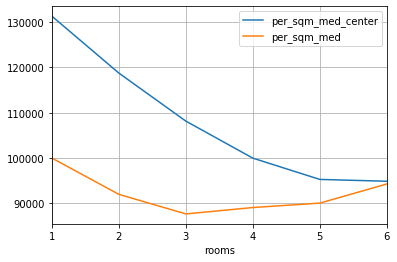

In [415]:
# график сравнения медианы цены кв.м по центру СПб и в общем, зависимость от числа комнат
cr_data_rooms_med.merge(data_rooms_med, on='rooms').plot(x='rooms', grid=True)

In [416]:
# коэффициент корреляции
cr_data_rooms_med['per_sqm_med_center'].corr(cr_data_rooms_med['rooms'])

-0.9584794681600264

#### Этаж

In [417]:
# вычислим медианы цены кв.м категории этажа для центра СПб и сравним с медианами общего случая
columns9 = ['level', 'per_sqm_med_center']
data9 = []
for i in ['первый','другой','последний']:
    level_med = cr[cr['level']==i]['per_sqm'].median()
    line9 = [i,level_med]
    data9.append(line9)
cr_data_level_med = pd.DataFrame(data=data9, columns=columns9)
cr_data_level_med.merge(data_level_med, on='level')

,level,per_sqm_med_center,per_sqm_med
0,первый,104348.0,81296.0
1,другой,113079.0,96970.0
2,последний,109446.5,86706.5


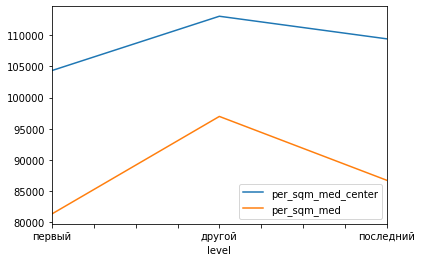

In [418]:
# ...и графическое выражение
cr_data_level_med.merge(data_level_med, on='level').plot(x='level')

#### Удаленность от центра

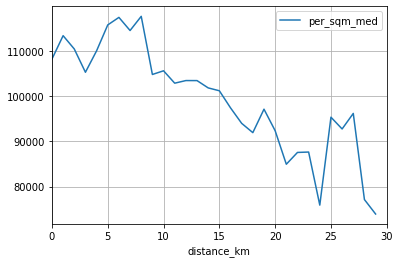

In [419]:
# график зависимости медианы цены кв.м от расстояние до центра
data_dist_med.plot(x='distance_km', y='per_sqm_med', grid=True, xlim=(0,xmax1))

In [420]:
# коэффициент корреляции
data_dist_med['per_sqm_med'].corr(data_dist_med[data_dist_med['distance_km']<=5]['distance_km'])

0.3256569635828202

#### Год размещения

In [421]:
# вычислим медианы цены кв.м по годам для центра СПб
columns10 = ['year', 'per_sqm_med_center']
data10 = []
year_list = df['year'].unique()
for i in year_list:
    y_med = cr[cr['year']==i]['per_sqm'].median()
    line10 = [i,y_med]
    data10.append(line10)
cr_data_year_med = pd.DataFrame(data=data10, columns=columns10).sort_values(by='year')
cr_data_year_med.merge(data_year_med, on='year')

,year,per_sqm_med_center,per_sqm_med
0,2014,114776.5,104341.5
1,2015,107055.5,91569.0
2,2016,108397.0,90698.0
3,2017,109745.0,91379.0
4,2018,113600.5,94965.5
5,2019,122252.0,101831.0


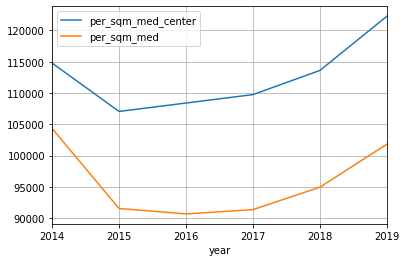

In [422]:
cr_data_year_med.merge(data_year_med, on='year').plot(x='year',grid=True)

#### Месяц размещения

In [423]:
# вычислим медианы цены кв.м по месяцам для центра СПб
columns11 = ['month_nr', 'per_sqm_med_center']
data11 = []
for i in range(1,13):
    month_med = cr[cr['month_nr']==i]['per_sqm'].median()
    line11 = [i,month_med]
    data11.append(line11)
cr_data_month_med = pd.DataFrame(data=data11, columns=columns11)
cr_data_month_med.merge(data_month_med, on='month_nr')

,month_nr,per_sqm_med_center,per_sqm_med
0,1,109107.5,93988.5
1,2,107558.5,93851.0
2,3,113257.0,94107.0
3,4,112333.0,95206.5
4,5,109896.5,91999.0
5,6,109524.0,91818.0
6,7,107816.5,93976.0
7,8,115385.0,95000.0
8,9,113286.5,94329.0
9,10,112898.5,93333.0


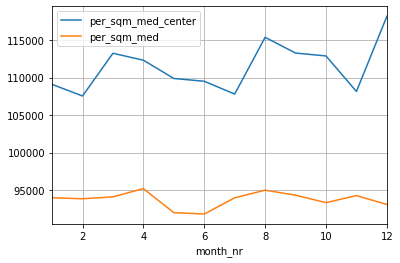

In [424]:
cr_data_month_med.merge(data_month_med, on='month_nr').plot(x='month_nr', grid=True)

#### Выводы по сравнение факторов, влияющих на стоимость кв.м: центр СПб и вся база данных в целом

Расстояние от центра города.   
В центральном районе цена практически не зависит от расстояния до непосредственно центра (хотя коэффициент корреляции для центра +0.32, но характер нелинеен). В целом по городу цена явно падает по мере удаления, коэффициент корреляции -0.87. 

Этаж.
В центре, как и в других районах, самыми дорогими являются квартиры на средних этажах. Хотя разница между ценой среднего этажа и крайних (особенно верхнего) в центре все-таки меньше, чем в целом по городу и области.  

Число комнат.
В центре корреляция отрицательна для 1-6 комнатных квартир при коэффициенте = -0.96. В целом по городу и области корреляция отрицательна для 1-3 комнатных, но положительна для 3-6 комнатных.

Год размещения.
В центральном районе тоже наблюдалось падение стоимости кв.м в 2014 г. Но, в отличии от города и области в целом, падение было менее резким, и рост начался раньше - в 2015 (по городу и области - 2016).

Месяц размещения.
Если для города и области можно заметить несущественное понижение цены кв.м в мае, то в центре такое явление не наблюдается.

### Шаг 5. Общий вывод

#### Что было сделано
- После изучения файла с базой данных были обработаны дупликаты и пропуски.
- Рассчитаны и добавлены в таблицу дополнительные необходимые для дальнейшей работы параметры.
- Проведен анализ параметров квартир и времени продажи методом изучения статистических данных, построения диаграммы размаха, гистограммы.
- Обработаны редкие и выбивающиеся значения.
- Выявлены параметры, наиболее влияющие на цену квартиры.
- Обозначены особенности объектов, расположенных в центре Санкт-Петербурга.

#### Параметры квартир.
- Общая площадь.   
Медианное значение равно 52 кв.м. Диаграммы размаха имеет границы 12-114 кв.м. 
- Цена квадратного метра.   
СПб и Ленинградскую область рассмотрели по отдельности ввиду значительного различия статистических данных. Медианное значение стоимости кв.м в СПб равно 90.9 т.р., в Ленобласти - 68.7 т.р. Нормальные значения в СПб лежат между 40614.0 и 174734.0, в Ленобласти - между 7963.0 и 134779.5.   
- Число комнат.   
Медианное значение равно 2. Нормальные значения - от 1 до 6 включительно.   
- Высота потолка.   
Медианное значение равно 2.65. Нормальные значения (границы диаграммы размаха) лежат в пределах от 2.38 до 3.22.   

#### Время продажи (период публикации объявления). 
Медианное значение равно 95 дням, среднее - 170.
Обычно продажа занимает от 45 до 200 дней. При сроках продажи до 45 дней можно говорить о быстрой продаже - только 25% всех наблюдений укладываются в эти значения. Сроки продажи более 200 дней являются необычно долгими - 75% всех объектов продаются до этого срока.   
Редкие значения, т.е. не попадающие в границы диаграммы размаха, составляют 9.7% от всех наблюдений.   
Выбивающиеся значения появились по двум причинам:   
-округление фактических значений до календарных периодов неделя, месяц, полтора месяца, два, два с половиной и три (на стадии составления базы данных);   
-замена пропущенных значений на медианные(на стадии предобработки данных).

#### Факторы, влияющие на стоимость квартиры (цену квадратного метра)
- Расстояние от центра города.   
В целом по городу и области зависимость отрицательная, коэффициент -0.87. В центральном районе по мере роста расстояния цена практичекси не меняется.   
- Этаж.   
Самыми дорогими являются квартиры на средних этажах. Первый этаж - самый дешевый. Можно отметить, что разница между ценой среднего этажа и крайних в центре СПб несколько меньше, чем в целом по городу и области. 
- Число комнат и общая площадь.   
В целом по городу и области корреляция отрицательна для 1-3 комнатных квартир и квартир площадью до 60 кв.м, но положительна для 3-6 комнатных и квартир общей площадью более 60 кв.м. Коэффициент (в данных срезах по отдельности) приближается к 1.
В центре СПБ корреляция отрицательна в любом случае, коэффициент по числу комнат = -0.96.   
- Год размещения.   
Явно заметно падение стоимости кв.м в 2014-2016 г. и последующий рост в 2016-2019 г. В центре СПБ по сравнению с городом и областью в целом можно отметить несколько менее резкое падение и более раннее начало восстановления уровня цен.
- Месяц размещения.   
Если для города и области можно отметить несущественное понижение цены кв.м в мае, то в центре такое явление не просматривается.